### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Load the Dataset

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

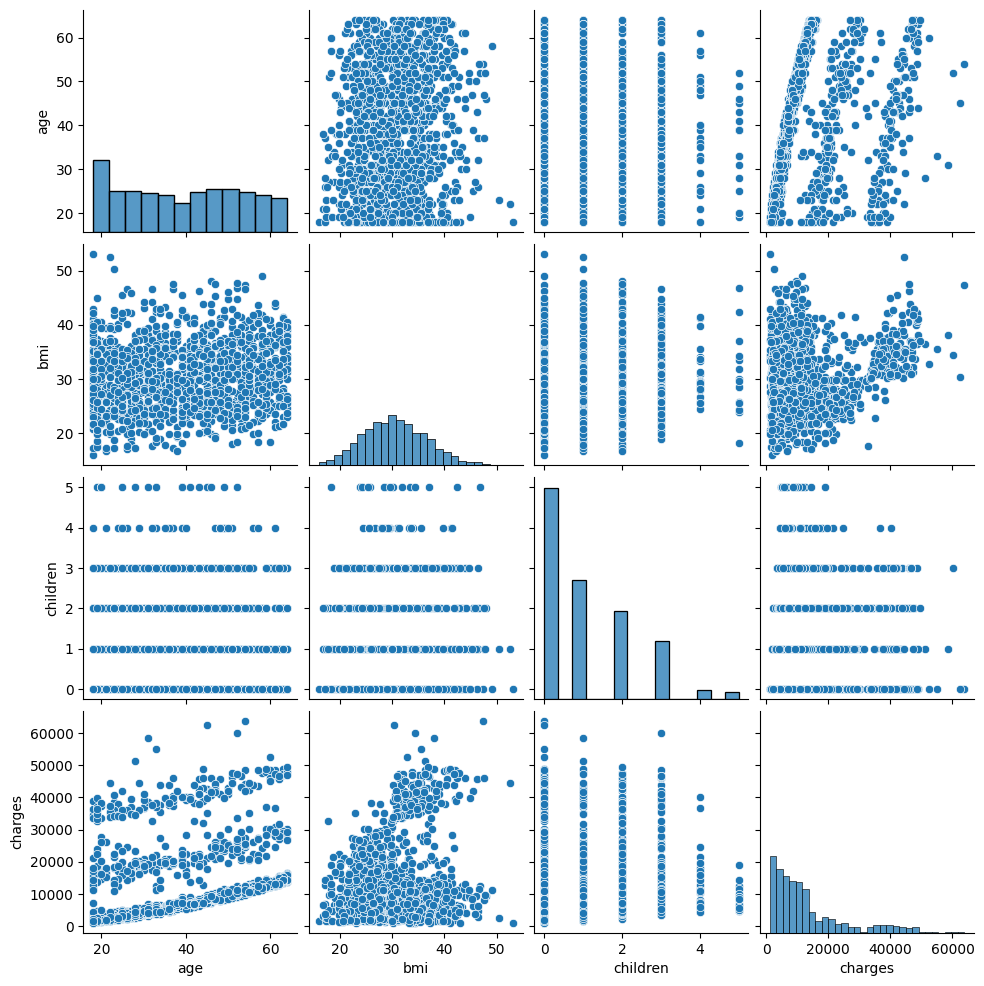

In [6]:
sns.pairplot(df)

### Plot Distributions for All Numeric Columns

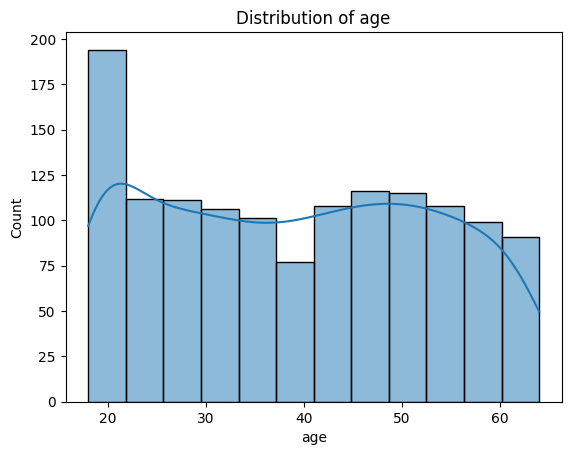

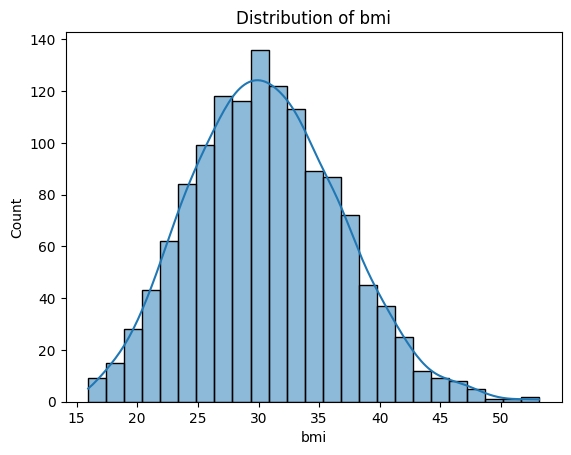

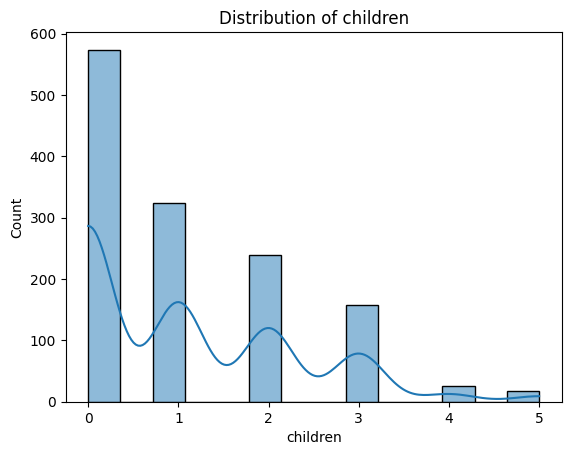

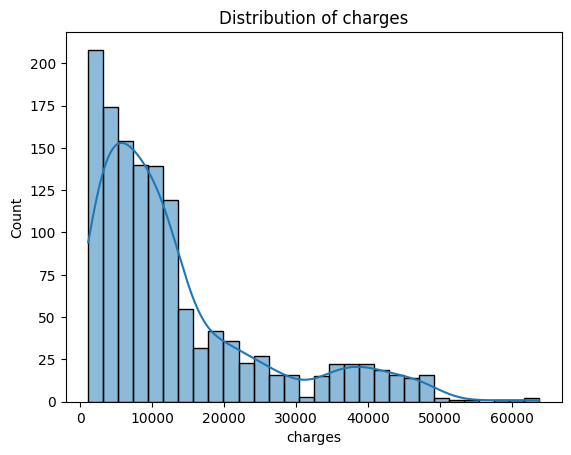

In [7]:
# Loop through numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


### Plot Categorical vs Numeric: Boxplots for All

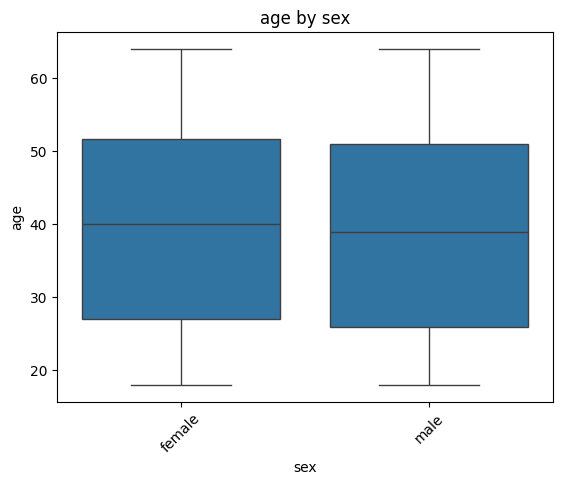

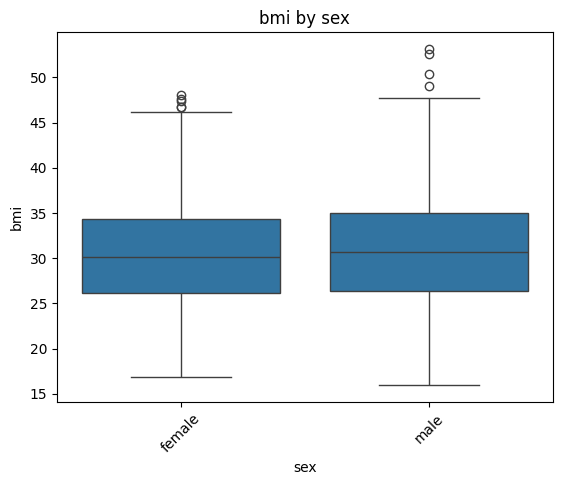

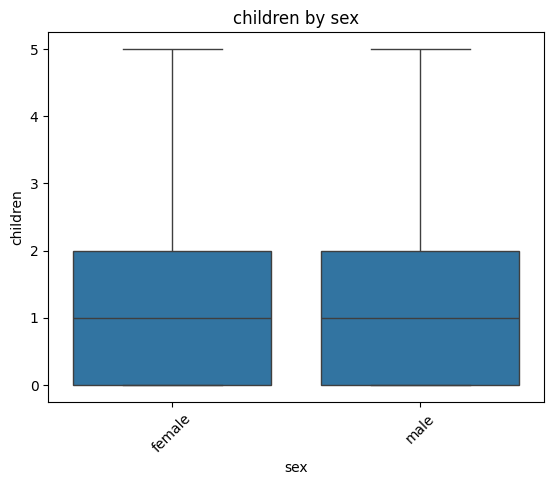

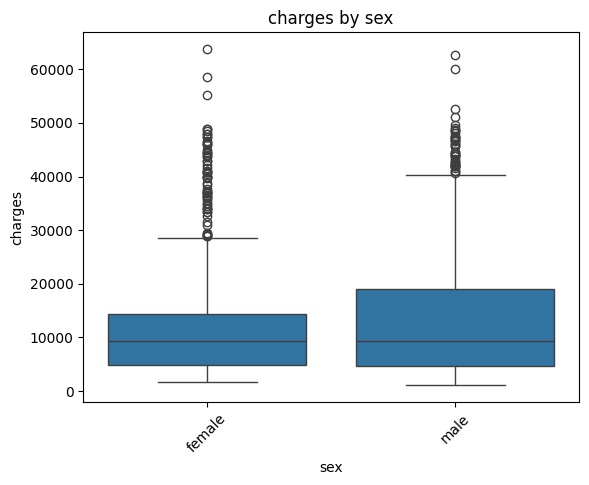

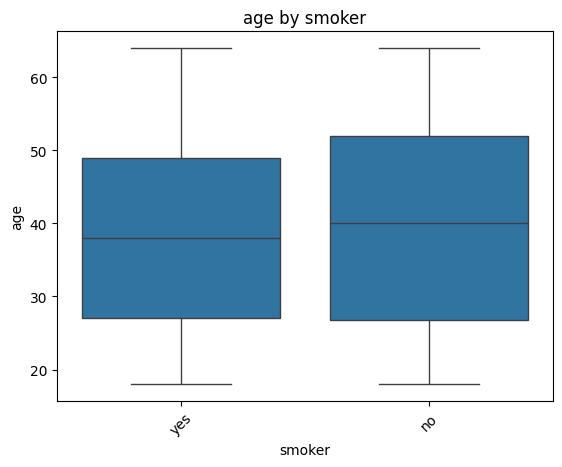

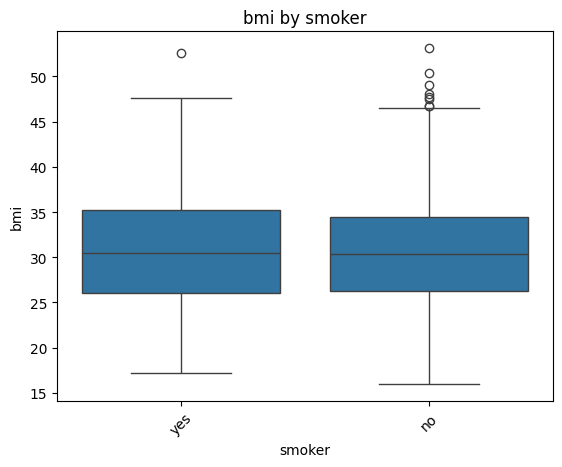

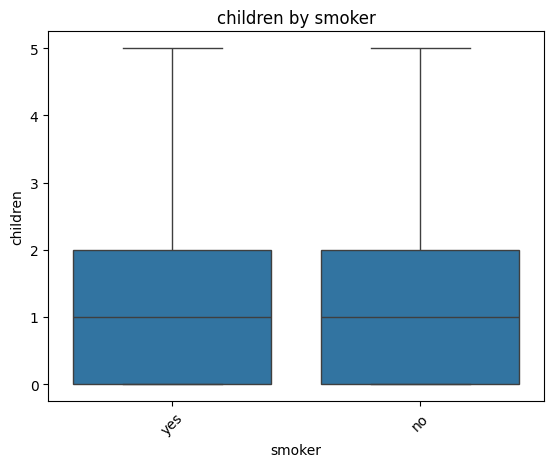

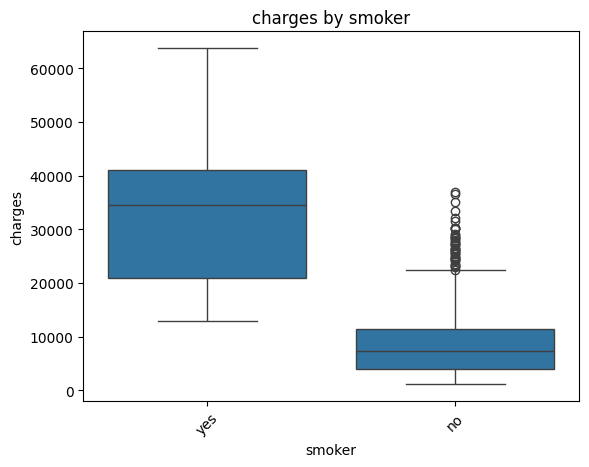

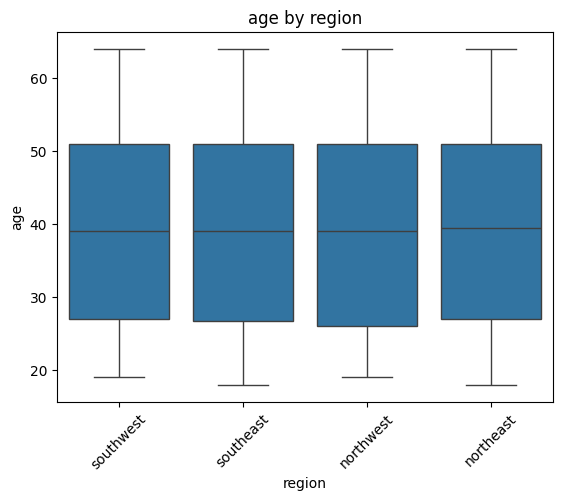

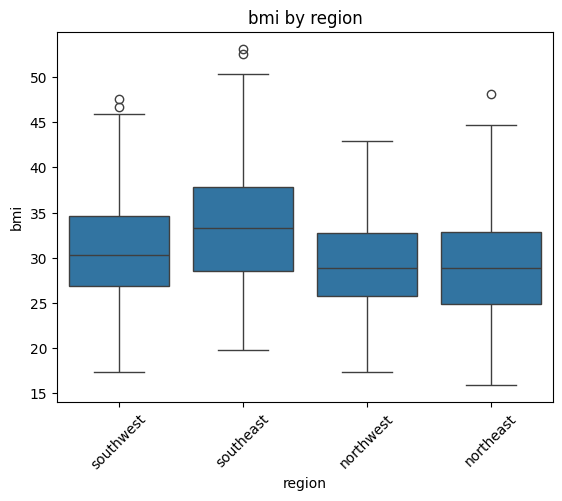

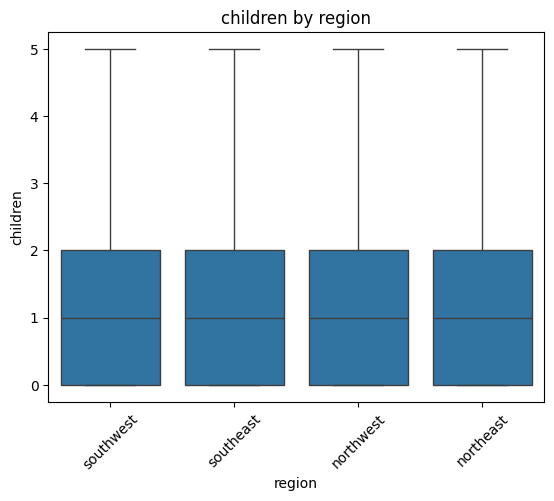

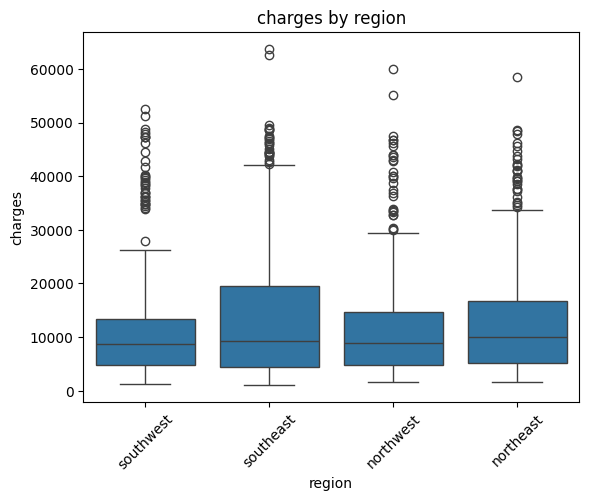

In [8]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
# For each categorical and numeric column pair
for cat_col in categorical_cols:
    for num_col in numeric_cols:
        sns.boxplot(data=df, x=cat_col, y=num_col)
        plt.title(f'{num_col} by {cat_col}')
        plt.xticks(rotation=45)
        plt.show()

### Correlation Heatmap (All Numeric Columns)

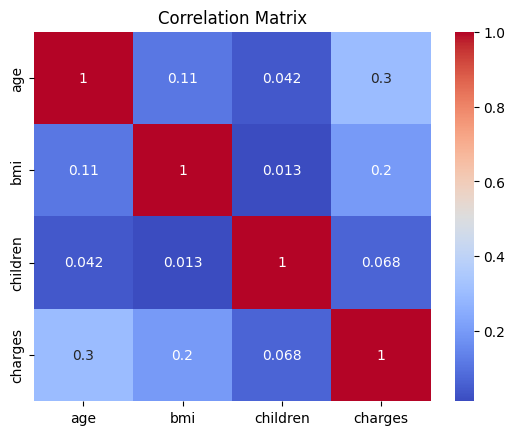

In [9]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Feature Engineering

In [10]:
# Converting categorical values to numbericals
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
print(categorical_cols)

Index(['sex', 'smoker', 'region'], dtype='object')


In [12]:
# One hot encoding categorical variables
df_encoded = pd.get_dummies(df,drop_first=True)
df_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [13]:
df_encoded[["sex_male","smoker_yes","region_northwest","region_southeast","region_southwest"]] \
      = df_encoded[["sex_male","smoker_yes","region_northwest","region_southeast","region_southwest"]].astype(int)

In [14]:
df_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


### Create Feature (x) and target (y) and split into train and test part

In [15]:
X = df_encoded.drop("charges",axis=1)
y = df_encoded[["charges"]]

In [16]:
X.shape

(1338, 8)

In [17]:
y.shape

(1338, 1)

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1070, 8)
(268, 8)
(1070, 1)
(268, 1)


### Model Training

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [21]:
print(model.coef_)
print(model.intercept_)

[[ 2.56975706e+02  3.37092552e+02  4.25278784e+02 -1.85916916e+01
   2.36511289e+04 -3.70677326e+02 -6.57864297e+02 -8.09799354e+02]]
[-11931.21905033]


In [22]:
X_train.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
560,46,19.95,2,0,0,1,0,0
1285,47,24.32,0,0,0,0,0,0
1142,52,24.86,0,0,0,0,1,0
969,39,34.32,5,0,0,0,1,0
486,54,21.47,3,0,0,1,0,0


In [23]:
Y_train.head()

,charges
560,9193.83850
1285,8534.67180
1142,27117.99378
969,8596.82780
486,12475.35130


### Model Evaluation

In [24]:
y_pred = model.predict(X_test)

### Model Scores

#### R^2 Score

In [25]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_test, y_pred)
print("R-squared: ",r2)

R-squared:  0.7835929767120724


##### ~78% of the variation in charges is explained by the model

#### Adjusted R^2

In [26]:
# Formula: Adjusted R2 = 1 - [(1-R2)(n-1) / (n-p-1)]
n = X_test.shape[0] # number of observations
p = X_test.shape[1] # number of predictors

adjusted_r2 = 1 - (1-r2)*(n-1) / (n-p-1)
print("Adjusted R-squared: ",adjusted_r2)

Adjusted R-squared:  0.7769085898923681


- Adjusted R2 penalizes for adding too many features.
- If adding a new feature increases R2 but decreases Adjusted R2 -> that feature might be noise.

#### Coefficients (Least Squares)

In [27]:
X.columns

Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [28]:
model.coef_.flatten()

array([ 2.56975706e+02,  3.37092552e+02,  4.25278784e+02, -1.85916916e+01,
        2.36511289e+04, -3.70677326e+02, -6.57864297e+02, -8.09799354e+02])

In [29]:
coef_df = pd.DataFrame({
    "Feature":X.columns,
    "Coefficient":model.coef_.flatten()
})

print(coef_df.sort_values(by="Coefficient", ascending=False))

            Feature   Coefficient
4        smoker_yes  23651.128856
2          children    425.278784
1               bmi    337.092552
0               age    256.975706
3          sex_male    -18.591692
5  region_northwest   -370.677326
6  region_southeast   -657.864297
7  region_southwest   -809.799354


##### Interpretation
- Positive coefficients: feature increases charges.
- Negative coefficients: feature decreases charges.
- Higher magnitute: more impact on prediction.

In [30]:
y_train_pred = model.predict(X_train).flatten()
print(y_train_pred.shape)

(1070,)


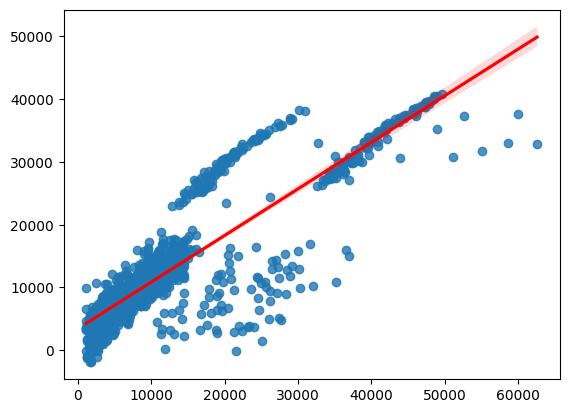

In [31]:
y_train_pred = model.predict(X_train).flatten()
# sns.scatterplot(x=Y_train.to_numpy().flatten(),y=y_train_pred)
sns.regplot(x=Y_train.to_numpy().flatten(), y=y_train_pred, line_kws={"color": "red"})
plt.show()

In [32]:
y_test_pred = model.predict(X_test).flatten()
print(y_test_pred.shape)

(268,)


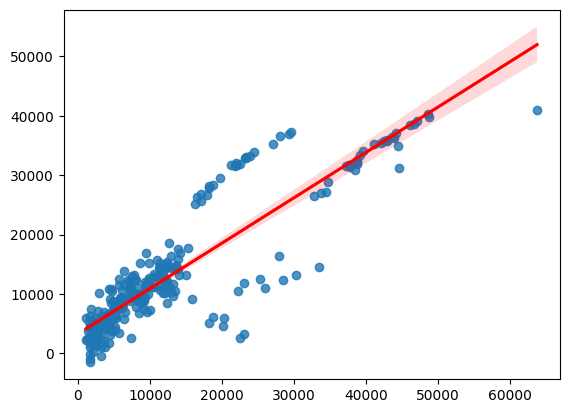

In [33]:
y_test_pred = model.predict(X_test).flatten()
# sns.scatterplot(x=Y_test.to_numpy().flatten(),y=y_test_pred)
sns.regplot(x=Y_test.to_numpy().flatten(), y=y_test_pred, line_kws={"color": "red"})
plt.show()

In [47]:
# Recursive Feature Elimation (Add one feature and check the Adjusted R2 score to find the good features)
from sklearn.feature_selection import RFE
selector = RFE(LinearRegression(), n_features_to_select=5)
selector.fit(X_train,Y_train)

selected_features = X_train.columns[selector.support_]
print("Top features: ", selected_features.tolist())

Top features:  ['bmi', 'children', 'smoker_yes', 'region_southeast', 'region_southwest']


In [48]:
# R² score using selected features
selected_X_train = X_train[selected_features]
selected_X_test = X_test[selected_features]

model = LinearRegression()
model.fit(selected_X_train, Y_train)
y_pred = model.predict(selected_X_test)

print("R² score using selected features: ", r2_score(Y_test, y_pred))


R² score using selected features:  0.6983827633824446
